# Data visualization with Matplotlib and Seaborn

Notebook developed by Sam Maurer

**Matplotlib** is the original, core data visualization library for the Python data science ecosystem. It's very powerful but the syntax is kind of byzantine. https://matplotlib.org

**Seaborn** is a wrapper for Matplotlib with nicer aesthetic defaults and automated templates for a variety of chart types. https://seaborn.pydata.org

#### Resources

- [Seaborn API reference](https://seaborn.pydata.org/api.html), highly recommended!

- [Seaborn tutorials](https://seaborn.pydata.org/tutorial.html), highly recommended!

- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)

- [Matplotlib API reference](https://matplotlib.org/api/index.html)

- [Matplotlib example gallery](https://matplotlib.org/gallery/index.html)

- [Python Data Science Handbook Chapter 4](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#4.-Visualization-with-Matplotlib), highly recommended!

## 1. Data preparation

This notebook uses a data file created in `chts-data-prep.ipynb`.

In [1]:
import pandas as pd

In [2]:
trips_raw = pd.read_csv('trips.csv')
len(trips_raw)

460524

In [3]:
trips_raw.head()

,sampno,perno,plano,mode,trip_distance_miles,prev_trip_duration_min,county_id,city,state,work,secondary,shopping,outdoors,perwgt
0,1031985,1,1,NaN,NaN,NaN,95.0,VALLEJO,CA,NaN,NaN,NaN,NaN,0.052086
1,1031985,1,2,6.0,13.428271,22.0,95.0,BENICIA,CA,NaN,1.0,NaN,NaN,0.052086
2,1031985,1,3,6.0,12.975526,20.0,95.0,VALLEJO,CA,NaN,NaN,NaN,NaN,0.052086
3,1031985,2,1,NaN,NaN,NaN,95.0,VALLEJO,CA,NaN,NaN,NaN,NaN,0.052086
4,1031985,2,2,5.0,5.125960,10.0,95.0,VALLEJO,CA,NaN,1.0,NaN,NaN,0.052086


In [6]:
# Filter out some missing values to make later analysis easier:

trips = trips_raw.loc[trips_raw.trip_distance_miles.notnull()]
len(trips)

349385

In [7]:
# How many trips are there for each travel mode?

trips['mode'].value_counts()

5.0     194737
6.0      86056
1.0      43557
15.0      6315
2.0       5905
7.0       2104
18.0      2068
24.0      1671
26.0      1003
8.0        994
10.0       685
11.0       591
25.0       512
13.0       488
4.0        438
9.0        418
16.0       336
14.0       331
3.0        250
21.0       219
19.0       173
28.0       108
17.0       103
23.0        96
27.0        91
29.0        84
22.0        24
20.0        16
12.0        12
Name: mode, dtype: int64

In [56]:
# Mode descriptions from the data dictionary:

# 1- Walk
# 2- Bike
# 3- Wheelchair/mobility scooter
# 4- Other non-motorized
# 5- Auto/van/truck driver
# 6- Auto/van/truck passenger
# 7- Carpool/vanpool
# 8- Motorcycle/scooter/moped
# 9- Taxi/hired car/limo
# 10- Rental car/vehicle
# 11- Private shuttle (Super shuttle, employer, hotel, etc.)
# 12- Greyhound bus
# 13- Plane
# 14- Other private transit
# 15- Local bus, rapid bus
# 16- Express bus/commuter bus (AC Transbay, Golden Gate Transit, etc.)
# 17- Premium bus (Metro Orange/Silver Line)
# 18- School bus
# 19- Public transit shuttle (DASH, Emery Go Round, etc.)
# 20- AirBART/LAX FlyAway
# 21- Dial-a-ride/paratransit (access services, etc.)
# 22- Amtrak bus
# 23- Other bus
# 24- BART, Metro Red/Purple Line
# 25- ACE, Amtrak, Cal- train, Coaster, Metrolink
# 26- Metro Blue/Green/Gold Line, Muni Metro, Sacramento Light Rail, San Diego Sprinter/Trolley/Orange/ Blue/Green, VTA light rail 
# 27- Streetcar/cable car
# 28- Other rail
# 29- Ferry/boat
# 99- RF

In [15]:
# Let's set up some subsets of the trips. First, trips that fall into the 
# driving, walking, cycling, bus, and subway categories:

common_trips = trips.loc[trips['mode'].isin([1,2,5,15,24])]
len(common_trips)

252185

In [34]:
# Trips ending in Los Angeles

los_angeles = common_trips.loc[common_trips.city == 'LOS ANGELES']
len(los_angeles)

14507

In [35]:
# Trips ending in Berkeley

berkeley = common_trips.loc[common_trips.city == 'BERKELEY']
len(berkeley)

2267

## 2. Introducing Matplotlib

The best way to load Matplotlib is with `import matplotlib.pyplot as plt`. Then we can use `plt` to access and control the current chart that Matplotlib is working with.

In [ ]:
import matplotlib.pyplot as plt

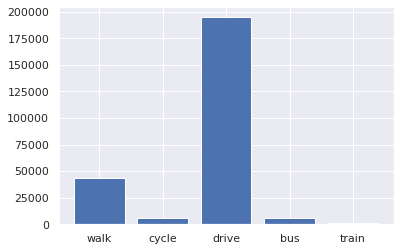

In [19]:
# Calculate trip counts
trip_counts = common_trips.groupby('mode')['mode'].count()

# Add bars to the current Matplotlib chart
plt.bar(['walk', 'cycle', 'drive', 'bus', 'train'], trip_counts)

# Display the current chart
plt.show()

## 3. Introducing Seaborn

Seaborn runs on top of Matplotlib, automating a lot of things.

In [ ]:
import seaborn as sns
sns.set()  # activate the Seaborn aesthetic defaults

Seaborn has a template to automatically group and count observations.

Count plot: https://seaborn.pydata.org/generated/seaborn.countplot.html

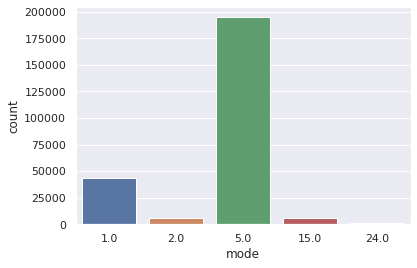

In [22]:
sns.countplot(data=common_trips, x='mode')

plt.show()

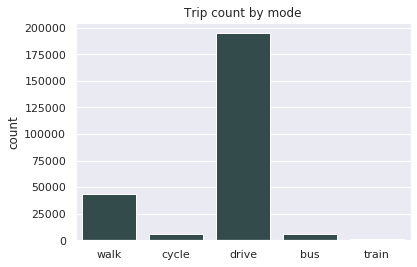

In [39]:
# Let's clean this up a little:

ax = sns.countplot(data=common_trips, x='mode', color='darkslategray')

# Seaborn can pass us a Matplotlib "axes" object for editing the labels
ax.set_title("Trip count by mode")
ax.set_xticklabels(['walk', 'cycle', 'drive', 'bus', 'train'])
ax.set_xlabel('')

plt.show()

Everything you can do to the axes object: https://matplotlib.org/3.1.1/api/axes_api.html

## 4. More ways of looking at categorical data

Strip plot: https://seaborn.pydata.org/generated/seaborn.stripplot.html

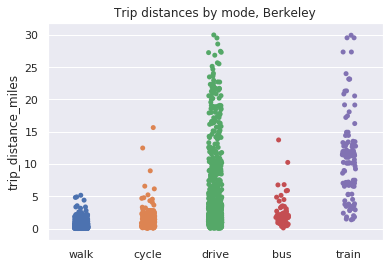

In [40]:
data = berkeley.loc[berkeley.trip_distance_miles < 30]

ax = sns.stripplot(x='mode', y='trip_distance_miles', data=data)

ax.set_title('Trip distances by mode, Berkeley')
ax.set_xticklabels(['walk', 'cycle', 'drive', 'bus', 'train'])
ax.set_xlabel('')

plt.show()

Box plot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

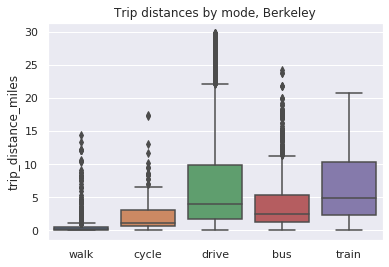

In [43]:
ax = sns.boxplot(x='mode', y='trip_distance_miles', data=data)

ax.set_title('Trip distances by mode, Berkeley')
ax.set_xticklabels(['walk', 'cycle', 'drive', 'bus', 'train'])
ax.set_xlabel('')

plt.show()

Let's clean it up a bit:

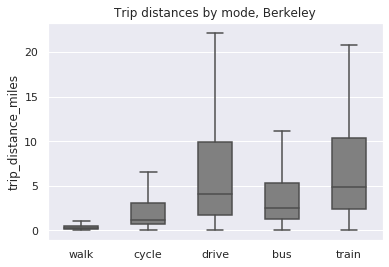

In [44]:
ax = sns.boxplot(x = 'mode', 
                 y = 'trip_distance_miles', 
                 data = data, 
                 width = 0.5,
                 color = 'gray',
                 showfliers = False)

ax.set_title('Trip distances by mode, Berkeley')
ax.set_xticklabels(['walk', 'cycle', 'drive', 'bus', 'train'])
ax.set_xlabel('')

plt.show()

## 5. Looking at the distribution of a single variable

Distplot: https://seaborn.pydata.org/generated/seaborn.distplot.html

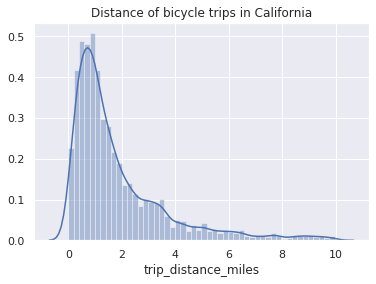

In [45]:
data = trips.loc[(trips['mode'] == 2) &  # bicycle trips
                 (trips.trip_distance_miles <= 10)]

# Note that a distplot takes a Series directly, rather than a DataFrame + colnames
ax = sns.distplot(a=data.trip_distance_miles)

ax.set_title('Distance of bicycle trips in California')
plt.show()

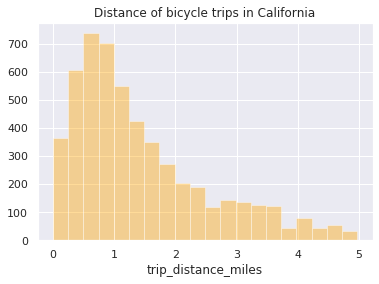

In [46]:
# Let's adjust the bins and remove the kernel density esimate:

data = trips.loc[(trips['mode'] == 2) & 
                 (trips.trip_distance_miles <= 5)]

ax = sns.distplot(a = data.trip_distance_miles,
                  bins = 20,
                  color = 'orange',
                  kde = False)

ax.set_title('Distance of bicycle trips in California')
plt.show()

## Exercises

Plot a histogram of the distance of bus trips in Berkeley, and a second one of BART trips.

Make a boxplot of trip distances by mode in Los Angeles. How does it compare to Berkeley?

## 6. Multiple plots on a single set of axes

kdeplot: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

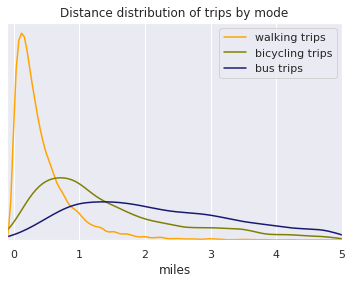

In [48]:
data = trips.loc[(trips.trip_distance_miles <= 5)]

ax = sns.kdeplot(data.loc[data['mode']==1].trip_distance_miles, 
                 color = 'orange', 
                 label = 'walking trips')

# Additional plots will show up on the same axes by default
ax = sns.kdeplot(data.loc[data['mode']==2].trip_distance_miles, 
                 color = 'olive',
                 label = 'bicycling trips')

ax = sns.kdeplot(data.loc[data['mode']==15].trip_distance_miles, 
                 color = 'midnightblue',
                 label = 'bus trips')

ax.set_xlim(-.1,5)
ax.set_xlabel('miles')
ax.set_yticks([])
ax.set_title('Distance distribution of trips by mode')
plt.show()

## 7. Multiple plots in a grid

There are various different ways to do this, depending on whether you want Seaborn to construct the grid automatically based on existing data categories, on you want full control over what appears where. Check out the Seaborn examples and tutorials for more options!

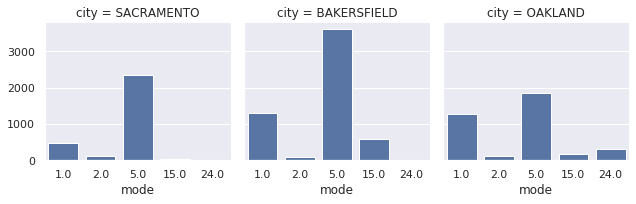

In [56]:
# We'll look at trip count by mode in three different cities
data = common_trips.loc[common_trips.city.isin(['SACRAMENTO','OAKLAND','BAKERSFIELD'])]

group = sns.FacetGrid(data, col='city')
group.map(sns.countplot, 'mode')

plt.show()

## More exercises

1. Try making a scatter plot of trip distances vs. durations. How about a bivariate distplot? (You can look these up in the Seaborn tutorials!)
  

2. Explore how modes and distances vary for different trip purposes.
  

3. Explore more of the variations among cities.